## Phishing Site Detection

In the Pre processing of the Data the attributes are coded into following format for application of KNN Classifier 

 	SFH's type is nominal, range is ('1', '-1', '0')
 	popUpWidnow's type is nominal, range is ('-1', '0', '1')
 	SSLfinal_State's type is nominal, range is ('1', '-1', '0')
 	Request_URL's type is nominal, range is ('-1', '0', '1')
 	URL_of_Anchor's type is nominal, range is ('-1', '0', '1')
 	web_traffic's type is nominal, range is ('1', '0', '-1')
 	URL_Length's type is nominal, range is ('1', '-1', '0')
 	age_of_domain's type is nominal, range is ('1', '-1')
 	having_IP_Address's type is nominal, range is ('0', '1')
 	Result's type is nominal, range is ('0', '1', '-1'))
    
    The  data coding is as follows:
    "1"  - Legitimate Website
    "0"  - Suspisious
    "-1" - Malicious Website

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
phishing_data_raw = loadarff("PhishingData.arff")

In [5]:
phishing_data_raw

(array([(b'-1', b'1', b'1', b'1', b'-1', b'-1', b'-1', b'-1', b'-1', b'1', b'1', b'-1', b'1', b'-1', b'1', b'-1', b'-1', b'-1', b'0', b'1', b'1', b'1', b'1', b'-1', b'-1', b'-1', b'-1', b'1', b'1', b'-1', b'-1'),
        (b'1', b'1', b'1', b'1', b'1', b'-1', b'0', b'1', b'-1', b'1', b'1', b'-1', b'1', b'0', b'-1', b'-1', b'1', b'1', b'0', b'1', b'1', b'1', b'1', b'-1', b'-1', b'0', b'-1', b'1', b'1', b'1', b'-1'),
        (b'1', b'0', b'1', b'1', b'1', b'-1', b'-1', b'-1', b'-1', b'1', b'1', b'-1', b'1', b'0', b'-1', b'-1', b'-1', b'-1', b'0', b'1', b'1', b'1', b'1', b'1', b'-1', b'1', b'-1', b'1', b'0', b'-1', b'-1'),
        ...,
        (b'1', b'-1', b'1', b'1', b'1', b'-1', b'1', b'-1', b'-1', b'1', b'1', b'1', b'1', b'0', b'-1', b'-1', b'1', b'1', b'0', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'-1', b'1', b'0', b'1', b'-1'),
        (b'-1', b'-1', b'1', b'1', b'1', b'-1', b'-1', b'-1', b'1', b'-1', b'1', b'1', b'-1', b'-1', b'1', b'-1', b'1', b'1', b'0', b'-1', b'1', b'-1', b'1'

In [6]:
len(phishing_data_raw)

2

In [9]:
# Selection of the Data and converting data into numpy format for flexibility in cleaning
phising_data_array = np.array(phishing_data_raw[0])
phising_data_array

array([(b'-1', b'1', b'1', b'1', b'-1', b'-1', b'-1', b'-1', b'-1', b'1', b'1', b'-1', b'1', b'-1', b'1', b'-1', b'-1', b'-1', b'0', b'1', b'1', b'1', b'1', b'-1', b'-1', b'-1', b'-1', b'1', b'1', b'-1', b'-1'),
       (b'1', b'1', b'1', b'1', b'1', b'-1', b'0', b'1', b'-1', b'1', b'1', b'-1', b'1', b'0', b'-1', b'-1', b'1', b'1', b'0', b'1', b'1', b'1', b'1', b'-1', b'-1', b'0', b'-1', b'1', b'1', b'1', b'-1'),
       (b'1', b'0', b'1', b'1', b'1', b'-1', b'-1', b'-1', b'-1', b'1', b'1', b'-1', b'1', b'0', b'-1', b'-1', b'-1', b'-1', b'0', b'1', b'1', b'1', b'1', b'1', b'-1', b'1', b'-1', b'1', b'0', b'-1', b'-1'),
       ...,
       (b'1', b'-1', b'1', b'1', b'1', b'-1', b'1', b'-1', b'-1', b'1', b'1', b'1', b'1', b'0', b'-1', b'-1', b'1', b'1', b'0', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'-1', b'1', b'0', b'1', b'-1'),
       (b'-1', b'-1', b'1', b'1', b'1', b'-1', b'-1', b'-1', b'1', b'-1', b'1', b'1', b'-1', b'-1', b'1', b'-1', b'1', b'1', b'0', b'-1', b'1', b'-1', b'1', b'1'

In [10]:
phising_data_array.shape

(11055,)

In [11]:
# Converting the numpy array into Pandas data frame  and casting the coloumns to numeric type
phising_data_frame = pd.DataFrame(phising_data_array).apply(pd.to_numeric)
phising_data_frame[0:10]

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [12]:
phising_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
having_IP_Address              11055 non-null int64
URL_Length                     11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitting_to_email            11055 non-null int64
Abnorma

In [13]:
col_names = list(phising_data_frame)
col_names

['having_IP_Address',
 'URL_Length',
 'Shortining_Service',
 'having_At_Symbol',
 'double_slash_redirecting',
 'Prefix_Suffix',
 'having_Sub_Domain',
 'SSLfinal_State',
 'Domain_registeration_length',
 'Favicon',
 'port',
 'HTTPS_token',
 'Request_URL',
 'URL_of_Anchor',
 'Links_in_tags',
 'SFH',
 'Submitting_to_email',
 'Abnormal_URL',
 'Redirect',
 'on_mouseover',
 'RightClick',
 'popUpWidnow',
 'Iframe',
 'age_of_domain',
 'DNSRecord',
 'web_traffic',
 'Page_Rank',
 'Google_Index',
 'Links_pointing_to_page',
 'Statistical_report',
 'Result']

In [15]:
col_names = list(phising_data_frame)# Geeting Column names of the pandas data frame
print("Coloumn_names:" + ", ".join(col_names))
# The scikit learn package takes data in form of labels and predictors
# Extracting Result coloum to pass as target coloum
labels = phising_data_frame["Result"].values
print(labels)

Coloumn_names:having_IP_Address, URL_Length, Shortining_Service, having_At_Symbol, double_slash_redirecting, Prefix_Suffix, having_Sub_Domain, SSLfinal_State, Domain_registeration_length, Favicon, port, HTTPS_token, Request_URL, URL_of_Anchor, Links_in_tags, SFH, Submitting_to_email, Abnormal_URL, Redirect, on_mouseover, RightClick, popUpWidnow, Iframe, age_of_domain, DNSRecord, web_traffic, Page_Rank, Google_Index, Links_pointing_to_page, Statistical_report, Result
[-1 -1 -1 ... -1 -1 -1]


In [16]:
predictor_cols = col_names[0:len(col_names)-2]# selecting the predictor column names
print("Predictor_Coloumns:" + ", ".join(predictor_cols))
#extracting Predictor points 
predictors = phising_data_frame[predictor_cols].values
predictors

Predictor_Coloumns:having_IP_Address, URL_Length, Shortining_Service, having_At_Symbol, double_slash_redirecting, Prefix_Suffix, having_Sub_Domain, SSLfinal_State, Domain_registeration_length, Favicon, port, HTTPS_token, Request_URL, URL_of_Anchor, Links_in_tags, SFH, Submitting_to_email, Abnormal_URL, Redirect, on_mouseover, RightClick, popUpWidnow, Iframe, age_of_domain, DNSRecord, web_traffic, Page_Rank, Google_Index, Links_pointing_to_page


array([[-1,  1,  1, ..., -1,  1,  1],
       [ 1,  1,  1, ..., -1,  1,  1],
       [ 1,  0,  1, ..., -1,  1,  0],
       ...,
       [ 1, -1,  1, ..., -1,  1,  0],
       [-1, -1,  1, ..., -1,  1,  1],
       [-1, -1,  1, ..., -1, -1,  1]], dtype=int64)

In [17]:
# Defining The parameters in KNN Classifier
clf_knn = KNeighborsClassifier(
    n_neighbors=10,
    weights='distance'
    )
clf_knn = clf_knn.fit(predictors,labels)

Text(0, 0.5, 'Cross Validation Mean score')

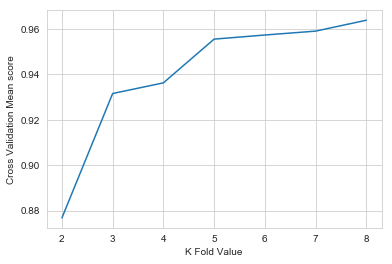

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline
cv_mean_score = []
cv_range = range(2,9)
for i in cv_range:
    score_knn = cross_val_score(clf_knn, predictors, labels, cv=i)
    cv_mean_score.append(score_knn.mean())
    #print("Cross Validation score : " + str(score_knn))
    #print("Cross Validation Mean score : " + str(score_knn.mean()))
plt.plot(cv_range, cv_mean_score)
plt.xlabel("K Fold Value")
plt.ylabel("Cross Validation Mean score")

In [27]:
# Computing the Cross validation score with 5-fold cross validation
score_knn = cross_val_score(clf_knn, predictors, labels, cv=9)
print("Cross Validation score : " + str(score_knn))
print("Cross Validation Mean score : " + str(score_knn.mean()))

Cross Validation score : [0.98536585 0.9812856  0.98045603 0.98615635 0.95114007 0.94299674
 0.94299674 0.9495114  0.94788274]
Cross Validation Mean score : 0.9630879463169233


## Try yourself
1> Apply Grid Search on the different values of k (5,7,9,11,13,15) <br/>
2> Perform CV(5) on each value of <b>k (k in kNN)</b> <br/>
3> Compare the <b>CV Score</b> to deduce the best model <br/>
4> Use the best value of k <br/>

In [30]:
# Add-on
# After finalizing the value of 'k' post Cross validation we can apply ML model as below.

col_names_ml = list(phising_data_frame)# Geeting Column names of the pandas data frame
print("Coloumn_names:" + ", ".join(col_names_ml))
# The scikit learn package takes data in form of labels and predictors
# Extracting Result coloum to pass as target coloum
labels_ml = phising_data_frame["Result"].values
print(labels_ml)



predictor_cols_ml = col_names_ml[0:len(col_names_ml)-2]# selecting the predictor column names
print("Predictor_Coloumns:" + ", ".join(predictor_cols_ml))
#extracting Predictor points 
predictors_ml = phising_data_frame[predictor_cols_ml].values
print(predictors_ml)


# split into train and test
X_train, X_test, y_train, y_test = train_test_split(predictors_ml, labels_ml, test_size=0.3, random_state=42)

# Defining The parameters in KNN Classifier
clf_knn_ml = KNeighborsClassifier(n_neighbors=10,weights='distance')
clf_knn_ml = clf_knn.fit(X_train,y_train)

pred = clf_knn_ml.predict(X_test)
target_names = ['-1', '1']
print(classification_report(y_test,pred,target_names=target_names))
confusion_matrix(y_test,pred)

Coloumn_names:having_IP_Address, URL_Length, Shortining_Service, having_At_Symbol, double_slash_redirecting, Prefix_Suffix, having_Sub_Domain, SSLfinal_State, Domain_registeration_length, Favicon, port, HTTPS_token, Request_URL, URL_of_Anchor, Links_in_tags, SFH, Submitting_to_email, Abnormal_URL, Redirect, on_mouseover, RightClick, popUpWidnow, Iframe, age_of_domain, DNSRecord, web_traffic, Page_Rank, Google_Index, Links_pointing_to_page, Statistical_report, Result
[-1 -1 -1 ... -1 -1 -1]
Predictor_Coloumns:having_IP_Address, URL_Length, Shortining_Service, having_At_Symbol, double_slash_redirecting, Prefix_Suffix, having_Sub_Domain, SSLfinal_State, Domain_registeration_length, Favicon, port, HTTPS_token, Request_URL, URL_of_Anchor, Links_in_tags, SFH, Submitting_to_email, Abnormal_URL, Redirect, on_mouseover, RightClick, popUpWidnow, Iframe, age_of_domain, DNSRecord, web_traffic, Page_Rank, Google_Index, Links_pointing_to_page
[[-1  1  1 ... -1  1  1]
 [ 1  1  1 ... -1  1  1]
 [ 1  0

array([[1344,   84],
       [  71, 1818]], dtype=int64)

In [31]:
print(accuracy_score(y_test,pred))

0.9532710280373832
